In [63]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import scipy
%matplotlib inline

In [48]:
base_dir = os.getcwd()+"\\out\\"
OUT_DIR = base_dir

### figure formatting

In [52]:
font={
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "font.size": 11,
}

plt.rcParams.update(font)

def create_fig():
    figure,ax = plt.subplots(figsize=(4,2.5))
    plt.grid()
    return figure, ax

def export_fig(fig, filename,out_dir=OUT_DIR, fformat=".pdf"):
    fig.savefig(os.path.join(out_dir+filename+fformat), bbox_inches='tight')

## Infinite plane

In [50]:
# get file from
dat = pd.read_csv(base_dir+"inf_plane_data.csv")
print(dat)

   Unnamed: 0  patch_size   col_raw   col_abs    col_rel     col_rt   dif_raw  \
0           0        50.0  0.069285  1.930715  96.535735   0.006040  0.040478   
1           1        25.0  0.069285  1.930715  96.535735   0.010339  0.040478   
2           2        10.0  0.895719  1.104281  55.214044   0.022270  0.620448   
3           3         5.0  0.901581  1.098419  54.920950   0.103847  0.622272   
4           4         2.5  1.601516  0.398484  19.924181   0.929777  1.322964   
5           5         1.0  1.939856  0.060144   3.007180  33.918469  1.891053   

    dif_abs    dif_rel     dif_rt  ...  var_rt_40  var_rt_45  var_rt_50  \
0  1.959522  97.976095   0.013632  ...   0.001254   0.008635   0.009967   
1  1.959522  97.976095   0.011194  ...   0.012164   0.012475   0.006643   
2  1.379552  68.977615   0.036130  ...   0.029136   0.031451   0.029934   
3  1.377728  68.886388   0.159743  ...   0.123172   0.118275   0.119384   
4  0.677036  33.851792   1.481076  ...   0.943913   0.875

colocated

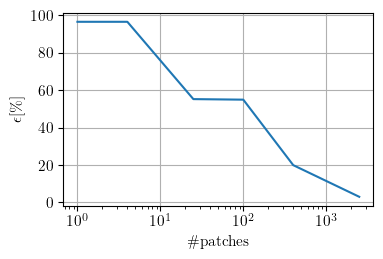

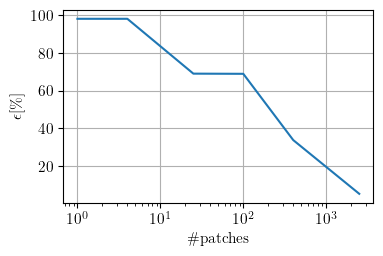

In [62]:
num_patches = (50/dat["patch_size"])**2

for code in ["col","dif"]:
# relative error as a function of patch size
    f,a = create_fig()
    plt.semilogx(num_patches,dat[code+"_rel"])
    plt.ylabel('$$\epsilon [\%]$$')
    plt.xlabel("$$ \mathrm{\# patches}$$")
    plt.show()
    export_fig(f,code+"_rel")



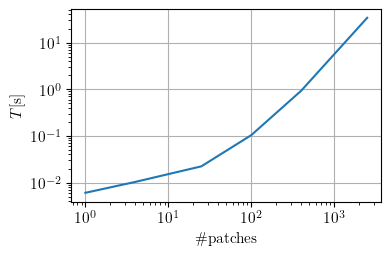

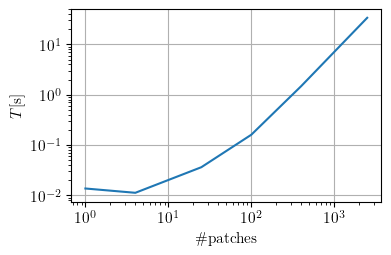

In [59]:
for code in ["col","dif"]:
    # runtime as a function of patch size
    f,a = create_fig()
    plt.loglog(num_patches,dat[code+"_rt"])
    plt.ylabel('$$T [\mathrm{s}]$$')
    plt.xlabel("$$ \mathrm{\# patches}$$")
    plt.show()
    export_fig(f,code+"_rt")

as a function of angle

In [ ]:
data_list = []

for ang in np.arange(5,90,5):
    data_list.append(dat["var_rel_"+f'{ang}'][-1])


f,a = create_fig()
plt.loglog(num_patches,data_list)
plt.ylabel('$$T [\mathrm{s}]$$')
plt.xlabel("$$ \mathrm{\# patches}$$")
plt.show()
export_fig(f,"var_rel")

KeyError: 'var_rel_0.08726646259971647'